### Závěrečný projekt - modul Python

V tomto projektu budete analyzovat data ze stránky `www.sreality.cz`. Budete tedy získávat aktuální nabídku bytů ve Zlíně.
Projekt se dělí na 2 části:
1. WebScraping - pomocí knihovny `BeautifulSoup` získejte všechny aktuální inzerce bytů v daném městě. 
- Získáte **tyto** informace: `URL odkaz bytu, rozměry bytu, dispozice bytu, cena bytu, lokace bytu (Ulice+město)`
2. Datová analýza - ETL proces
- V první fázi prověďte processing dat tak, aby obsahovala příslušné datové typy, nenulové hodnoty atp. Ulice i město bude v samostatných sloupcích.
- Zprocesovaná a vyčištěná data vyexportujte do `.csv` souboru s názvem `{vašeJméno}_zdrojová_data.csv`
3. Datová analýza - analýza dat
- Třetí část začněte tak, že si do dataframe nahrajete vámi vyexportovaný `.csv` soubor s vyscrapovanými daty.
- Ve druhé fázi proveďte analýzu dat a odpovězte na tyto dotazy:
- `Jaká je průměrná cena bytů?`
- `Jaká je průměrná cena bytů pro každou dispozice (1+1, 2+1, atp.)? Zobrazte i na grafu.`
- `Jaká je průměrná velikost bytu pro každou dispozice?`
- `Existuje ulice, kde je vyšší koncentrace dražších bytů?`
- `Jaký typ dispozice je v daném městě nejčastěji inzerovan? Který to je? Proč myslíte, že tomu tak je?`
- `Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?`
- `Zjištěte minimální a maximální inzerce pro každou dispozici bytu. Která dispozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?`


Dotazy zodpovězte ve vašem pracovním notebooku a výsledný soubor nahrajte na GitHub.


### WebScraping

In [171]:
from bs4 import BeautifulSoup
import requests

strana = 1
tabulka = []

while strana < 4:
    response = requests.get(f'https://www.sreality.cz/hledani/pronajem/byty/pribram?strana={strana}').text
    soup = BeautifulSoup(response, 'html.parser')

    vsechny_inzeraty = soup.find_all(name='li', class_='MuiGrid2-direction-xs-row')

    for cely_inzerat in vsechny_inzeraty:
        try:
            #rozdělení nazvu od adresy
            rozdeleni = cely_inzerat.find_all('p', class_='css-d7upve')

            if len(rozdeleni) >= 2:
                nazev = rozdeleni[0].get_text(strip=True)
                adresa = rozdeleni[1].get_text(strip=True)
            else:
                nazev = adresa = None

            # Cena
            cena = cely_inzerat.find(name='p', class_='css-ca9wwd').text.strip()

            inzerat = {
                'dispozice': nazev.strip(":SLEVA/Pronájem bytu"),
                'adresa': adresa,
                'cena': cena.strip("Kč/měsíc")
            }
            tabulka.append(inzerat)

        except AttributeError:
            continue


    strana += 1

print(tabulka)

[{'dispozice': '1+kk 30\xa0m²', 'adresa': 'Dobříš', 'cena': '12\xa0900\xa0'}, {'dispozice': '1+kk 30\xa0m²', 'adresa': 'Dobříš', 'cena': '13\xa0000\xa0'}, {'dispozice': '1+1 36\xa0m²', 'adresa': 'Nádražní, Příbram - Příbram IV', 'cena': '9\xa0999\xa0'}, {'dispozice': '2+1 51\xa0m²', 'adresa': 'Petra Bezruče, Příbram - Příbram IV', 'cena': '13\xa0000\xa0'}, {'dispozice': '1+1 32\xa0m²', 'adresa': 'Legionářů, Příbram - Příbram VII', 'cena': '10\xa0000\xa0'}, {'dispozice': '1+1 40\xa0m²', 'adresa': 'Legionářů, Příbram - Příbram VII', 'cena': '8\xa0500\xa0'}, {'dispozice': '1+kk 49\xa0m²', 'adresa': 'U Pivovaru, Dobříš', 'cena': '14\xa0900\xa0'}, {'dispozice': '1+kk 30\xa0m²', 'adresa': 'U Pivovaru, Dobříš', 'cena': '14\xa0400\xa0'}, {'dispozice': '1+1 38\xa0m²', 'adresa': 'Okružní, Příbram - Příbram VII', 'cena': '10\xa0500\xa0'}, {'dispozice': '3+1 76\xa0m²', 'adresa': 'Lhota u Příbramě', 'cena': '15\xa0000\xa0'}, {'dispozice': '1+kk 33\xa0m²', 'adresa': 'U Pivovaru, Dobříš', 'cena': '12

In [179]:
import pandas as pd
df = pd.DataFrame(tabulka)
df.head(60)

,dispozice,adresa,cena
0,1+kk 30 m²,Dobříš,12 900
1,1+kk 30 m²,Dobříš,13 000
2,1+1 36 m²,"Nádražní, Příbram - Příbram IV",9 999
3,2+1 51 m²,"Petra Bezruče, Příbram - Příbram IV",13 000
4,1+1 32 m²,"Legionářů, Příbram - Příbram VII",10 000
5,1+1 40 m²,"Legionářů, Příbram - Příbram VII",8 500
6,1+kk 49 m²,"U Pivovaru, Dobříš",14 900
7,1+kk 30 m²,"U Pivovaru, Dobříš",14 400
8,1+1 38 m²,"Okružní, Příbram - Příbram VII",10 500
9,3+1 76 m²,Lhota u Příbramě,15 000


In [260]:
import pandas as pd
df = pd.DataFrame(tabulka)
#sloupec dispozice, metraz, jednotka
df[['dispozice', 'metraz', 'jednotka']] = df['dispozice'].str.split(expand=True)

#sloupec ulice a mesto
df[['ulice', 'mesto']] = df['adresa'].str.split(',', n=1,expand=True)

df['metraz_m2'] = df['metraz'].astype(int)

#uprava dat v mesto a ulice
df['mesto'] = df['mesto'].fillna(df['ulice'])

df.loc[df['mesto'] == df['ulice'], 'ulice'] = None

#chci jen Příbram bez městských částí
def uprav_mesto(mesto):
    if isinstance(mesto, str) and 'příbram' in mesto.lower():
        return 'Příbram'
    return mesto

df['mesto'] = df['mesto'].apply(uprav_mesto)
df['mesto'] = df['mesto'].str.strip()


#Mažu řádky kde je cena na vyžádání
df = df[~df['cena'].str.contains('Na vyžádán', case=False, na=False)]

#odstranuju mezery a převádím na int
df['cena'] = df['cena'].str.replace(r'\D', '', regex=True).astype(int)
df['metraz'] = df['metraz'].str.replace(r'\D', '', regex=True).astype(int)

df.to_csv('stichova_zdrojova_data.csv', index=False, encoding='utf-8')


### Datová analýza

In [259]:
df.head(60)


,dispozice,adresa,cena,metraz,jednotka,ulice,mesto,metraz_m2
0,1+kk,Dobříš,12900,30,m²,None,Dobříš,30
1,1+kk,Dobříš,13000,30,m²,None,Dobříš,30
2,1+1,"Nádražní, Příbram - Příbram IV",9999,36,m²,Nádražní,Příbram,36
3,2+1,"Petra Bezruče, Příbram - Příbram IV",13000,51,m²,Petra Bezruče,Příbram,51
4,1+1,"Legionářů, Příbram - Příbram VII",10000,32,m²,Legionářů,Příbram,32
5,1+1,"Legionářů, Příbram - Příbram VII",8500,40,m²,Legionářů,Příbram,40
6,1+kk,"U Pivovaru, Dobříš",14900,49,m²,U Pivovaru,Dobříš,49
7,1+kk,"U Pivovaru, Dobříš",14400,30,m²,U Pivovaru,Dobříš,30
8,1+1,"Okružní, Příbram - Příbram VII",10500,38,m²,Okružní,Příbram,38
9,3+1,Lhota u Příbramě,15000,76,m²,None,Příbram,76


In [279]:
import pandas as pd

df = pd.read_csv('stichova_zdrojova_data.csv', sep=',', encoding='utf-8')    #pd.read_csv('data.csv')

#Jaká je průměrná cena bytů?`
prumerna_cena = round(df['cena'].mean())
print(f"Průměrná cena bytu je {prumerna_cena} Kč")


Průměrná cena bytu je 12604 Kč


Průměrná cena bytu dle dispozice je 
 dispozice
1+1      9743.0
1+kk    11711.0
2+1     13483.0
2+kk    12714.0
3+1     17333.0
3+kk    13600.0
Name: cena, dtype: float64


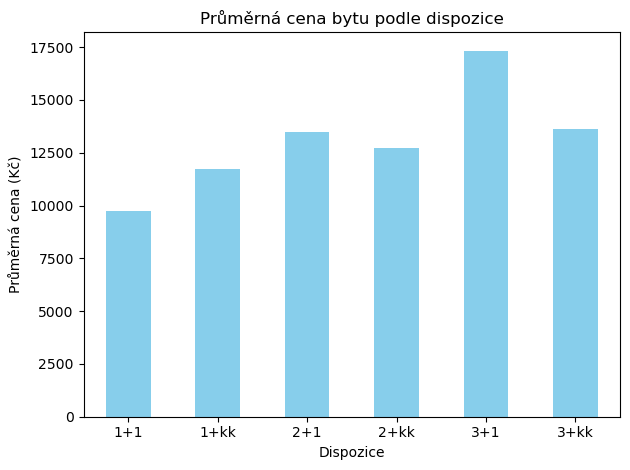

In [297]:
#Jaká je průměrná cena bytů pro každou dispozice (1+1, 2+1, atp.)? Zobrazte i na grafu.`

prumerna_cena_dispozice = round(df.groupby("dispozice")["cena"].mean())
print(f"Průměrná cena bytu dle dispozice je \n {prumerna_cena_dispozice}")

import matplotlib.pyplot as plt

prumerna_cena_dispozice.plot(kind='bar', color='skyblue')

plt.title('Průměrná cena bytu podle dispozice')
plt.xlabel('Dispozice')
plt.ylabel('Průměrná cena (Kč)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [274]:
#Jaká je průměrná velikost bytu pro každou dispozice?`

prumerna_velikost_dispozice = round(df.groupby("dispozice")["metraz_m2"].mean())
print(f"Průměrná metráž bytu v metrech krychlových dle {prumerna_velikost_dispozice}")

Průměrná metráž bytu v metrech krychlových dle dispozice
1+1     42.0
1+kk    33.0
2+1     56.0
2+kk    49.0
3+1     79.0
3+kk    66.0
Name: metraz_m2, dtype: float64


Protože se mi do analýzy promítá více měst a některé jsou dražší díky své vzdálenosti do Prahy, tak počítám průměrnou cenu na dané město.
  Průměrná cena dle  mesto
Jince                      18000.0
Dobříš                     14044.0
Příbram                    12380.0
Petrovice                  12000.0
Nečín                      11500.0
Březnice                   10833.0
Čím                        10500.0
Krásná Hora nad Vltavou     6850.0
Name: cena, dtype: float64


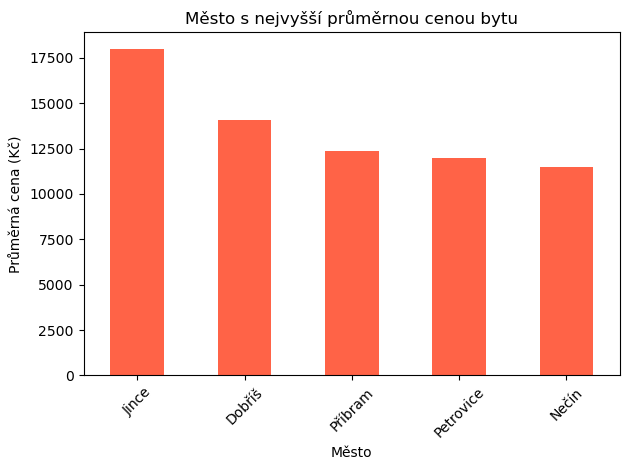

In [276]:
#Existuje ulice, kde je vyšší koncentrace dražších bytů?`

import matplotlib.pyplot as plt

prumerna_cena_mesta = round(df.groupby('mesto')['cena'].mean().sort_values(ascending=False))
print(f"Protože se mi do analýzy promítá více měst a některé jsou dražší díky své vzdálenosti do Prahy, tak počítám průměrnou cenu na dané město.\n  Průměrná cena dle  {prumerna_cena_mesta}")

top_mesto = prumerna_cena_mesta.head(5)

top_mesto.plot(kind='bar', color='tomato')


plt.title('Město s nejvyšší průměrnou cenou bytu')
plt.xlabel('Město')
plt.ylabel('Průměrná cena (Kč)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Rozložení počtů inzerovaných bytů  dle dispozice
1+kk    18
2+1     15
3+kk     8
1+1      7
2+kk     7
3+1      3
Name: count, dtype: int64 
 Počet menších bytů je zřejmě ovlivněn pořizovací cenou a jejich využitím jako investiční byty.
 V grafu si můžeme ukázat podílové zastoupení jednotlivých složek:


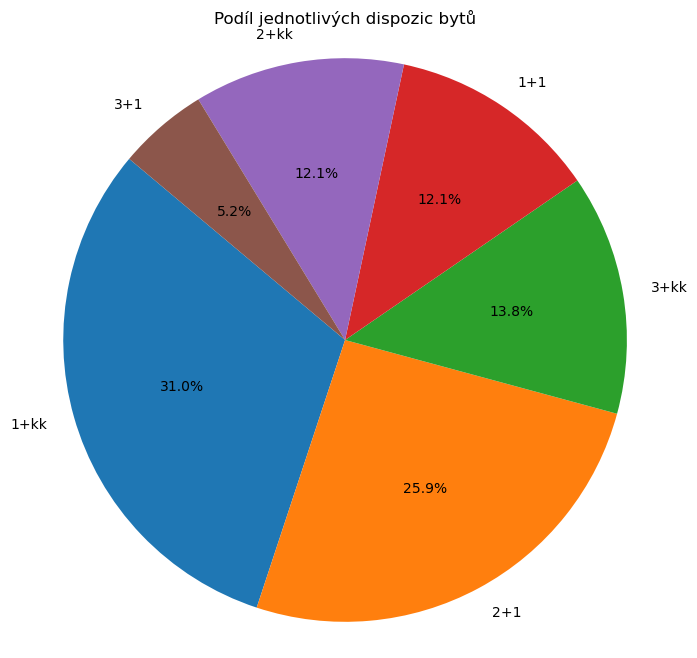

In [278]:
#Jaký typ dispozice je v daném městě nejčastěji inzerovan? Který to je? Proč myslíte, že tomu tak je?`

pocet_bytu_dle_dispozice = (df['dispozice'].value_counts())
print(f" Rozložení počtů inzerovaných bytů  dle {pocet_bytu_dle_dispozice} \n Počet menších bytů je zřejmě ovlivněn pořizovací cenou a jejich využitím jako investiční byty.\n V grafu si můžeme ukázat podílové zastoupení jednotlivých složek:")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(pocet_bytu_dle_dispozice, labels=pocet_bytu_dle_dispozice.index, autopct='%1.1f%%', startangle=140)
plt.title('Podíl jednotlivých dispozic bytů')
plt.axis('equal')
plt.show()

In [ ]:
#Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?`

byty_vyssi_cena = df[df['cena'] > 20000]

print(F"Vzhledem k jednomu výskytu na první pohled vidím, že je jen jeden byt, který stojí více než 20000Kč a jedná se o třípokojový. ")

vyssi_cena_dvoupokojove = byty_vyssi_cena[byty_vyssi_cena['dispozice'].isin(['2+1', '2+kk'])]
print(f"Počet dvojpokojových bytů s vyšší cenou než 20000 Kč: {len(vyssi_cena_dvoupokojove)}")


Vzhledem k jednomu výskytu na první pohled vidím, že je jen jeden byt, který stojí více než 20000Kč a jedná se o třípokojový 
Počet dvojpokojových bytů s vyšší cenou než 20000 Kč: 0


             min    max     mean   median  rozptyl
dispozice                                         
1+1         8000  11300   9743.0   9999.0     3300
1+kk        5700  18500  11711.0  11750.0    12800
2+1        11000  16500  13483.0  13000.0     5500
2+kk       10000  16500  12714.0  12000.0     6500
3+1        15000  19000  17333.0  18000.0     4000
3+kk        9990  23500  13600.0  12250.0    13510

Dispozice s největším rozptylem cen má byt 3+kk. Za povšinutí ovšem stojí také cenový rozptyl pro 1+KK. 
Obě kategorie s největším rozptylem mají patrné extrémní hodnoty, které se silně vymykají průměru a mediánu.


C:\Users\user\AppData\Local\Temp\ipykernel_3756\3639215825.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dispozice', y='cena', palette='coolwarm')


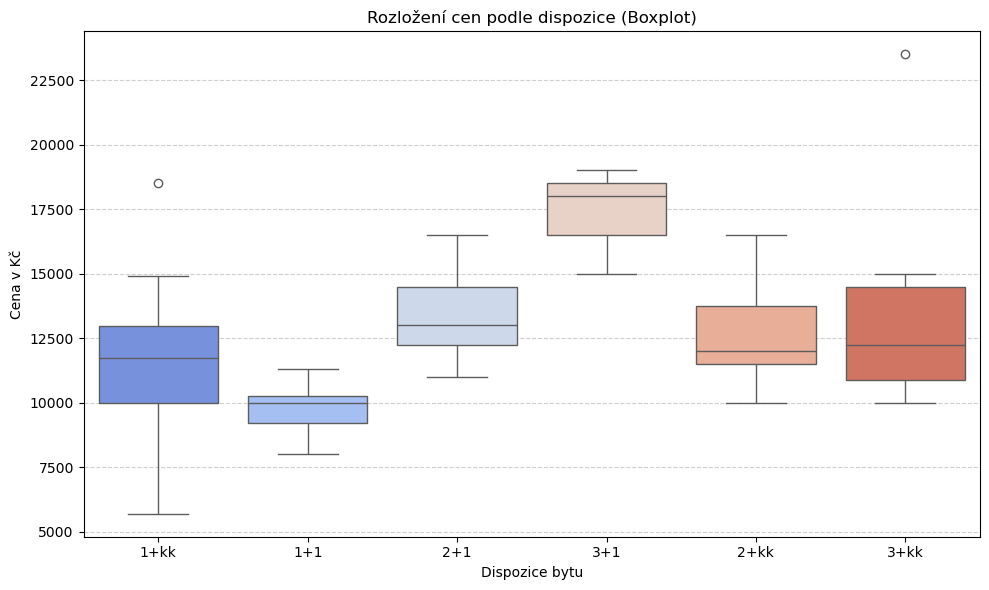

In [293]:
#Zjištěte minimální a maximální cenu inzerce pro každou dispozici bytu. Která dispozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?`

cenovy_rozsah = round(df.groupby("dispozice")["cena"].agg(["min", "max", "mean", "median"]))

cenovy_rozsah["rozptyl"] = cenovy_rozsah["max"] - cenovy_rozsah["min"]

print(cenovy_rozsah)

nejvetsi_rozptyl = cenovy_rozsah["rozptyl"].idxmax()
print(f"\nDispozice s největším rozptylem cen má byt {nejvetsi_rozptyl}. Za povšinutí ovšem stojí také cenový rozptyl pro 1+KK. \nObě kategorie s největším rozptylem mají patrné extrémní hodnoty, které se silně vymykají průměru a mediánu.")


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='dispozice', y='cena', palette='coolwarm')

plt.title('Rozložení cen podle dispozice (Boxplot)')
plt.xlabel('Dispozice bytu')
plt.ylabel('Cena v Kč')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()